In [1]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.stem.porter import PorterStemmer
import spacy
import os
pd.options.mode.chained_assignment = None
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/ashok/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
bag_size = 2000
text_file_prefix = 'tweet'
text_field = 'text'
hashtag_file_prefix = 'hashtag'
hashtag_field = 'hashtag'
other_file_prefix = 'others'
bio_file_prefix = 'bio'
bio_field = 'user description'

In [3]:
csvname="filtered_dataset/"+text_file_prefix+".csv" #changed
# csvname=file_prefix+".csv" #changed
text_data_orig=pd.read_csv(csvname)
text_data=text_data_orig.copy()
text_data.drop(text_data.columns[text_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
rows=len(text_data)

In [4]:
csvname="filtered_dataset/"+hashtag_file_prefix+".csv" #changed
# csvname=file_prefix+".csv" #changed
hashtag_data_orig=pd.read_csv(csvname)
hashtag_data=hashtag_data_orig.copy()
hashtag_data.drop(hashtag_data.columns[hashtag_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
rows=len(hashtag_data)

In [5]:
csvname="processed_dataset/"+other_file_prefix+".csv" #changed
# csvname=file_prefix+".csv" #changed
other_data=pd.read_csv(csvname)
other_data=other_data.drop(['class'], axis=1)


In [6]:
csvname="filtered_dataset/"+bio_file_prefix+".csv" #changed
# csvname=file_prefix+".csv" #changed
bio_data_orig=pd.read_csv(csvname)
bio_data=bio_data_orig.copy()
bio_data.drop(bio_data.columns[bio_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
rows=len(bio_data)

In [7]:
def filter_text(in_data, field):
  data = in_data.copy()
  for i in range (0,rows):
    oldtext=data[field][i] 
    newtext=' '.join(re.sub("(@[A-Za-z0-9]+)| (_URL_) | (#[A-Za-z0-9]+)|(\w+:\/\/\S+)"," ",str(oldtext)).split()) # removes hashtags, https links, usernames.
    newtext= re.sub('[^a-zA-Z0-9]'," ",str(newtext)) #removes all other characters other than English Alpha-Numeric Characters
    newtext=newtext.lower()
    newtext=newtext.split()
    data[field][i]=newtext
  return data

In [8]:
filtered_text_data=filter_text(text_data, text_field)
filtered_text_data

,text,class
0,"[much, of, the, focus, on, recently, has, been...",0
1,"[icymi, the, first, probable, case, of, monkey...",0
2,"[who, outbreak, not, yet, a, global, public, h...",0
3,"[according, to, the, cdc, monkeypox, is, usual...",0
4,"[lgbtq, advocates, and, health, care, organiza...",0
...,...,...
5782,"[an, effort, has, been, to, perpetuate, varian...",1
5783,"[an, effort, has, been, to, perpetuate, varian...",1
5784,"[it, seems, we, have, a, new, variant, coming,...",1
5785,"[news, from, what, i, gather, monkey, pox, has...",1


In [9]:
filtered_hashtag_data=filter_text(hashtag_data, hashtag_field)
filtered_hashtag_data

,hashtag,class
0,"[aidsmaplive, monkeypox]",0
1,[nan],0
2,"[healthcare, monkeypox]",0
3,[nan],0
4,[nan],0
...,...,...
5782,[nan],1
5783,[nan],1
5784,[nan],1
5785,[nan],1


In [10]:
filtered_bio_data=filter_text(bio_data, bio_field)
filtered_bio_data

,user description,class
0,"[mother, of, 4, ex, wife, of, 3, battling, hea...",0
1,"[wchs, tv, serves, the, charleston, huntington...",0
2,"[patient, engagement, revenue, cycle, manageme...",0
3,"[home, of, the, minnesota, and, always, live, ...",0
4,"[spectrum, news, 1, offers, the, best, 24, hou...",0
...,...,...
5782,[none],1
5783,[none],1
5784,"[hermit, who, loves, to, read, and, has, 4, do...",1
5785,"[a, well, educated, mind, will, always, have, ...",1


In [11]:
filtered_data = filtered_text_data.copy()
filtered_data[text_field] += filtered_hashtag_data[hashtag_field]
filtered_data

,text,class
0,"[much, of, the, focus, on, recently, has, been...",0
1,"[icymi, the, first, probable, case, of, monkey...",0
2,"[who, outbreak, not, yet, a, global, public, h...",0
3,"[according, to, the, cdc, monkeypox, is, usual...",0
4,"[lgbtq, advocates, and, health, care, organiza...",0
...,...,...
5782,"[an, effort, has, been, to, perpetuate, varian...",1
5783,"[an, effort, has, been, to, perpetuate, varian...",1
5784,"[it, seems, we, have, a, new, variant, coming,...",1
5785,"[news, from, what, i, gather, monkey, pox, has...",1


In [12]:
def porterstemming(in_data, field=text_field):
  data = in_data.copy()
  for i in range (0,rows):
    ps=PorterStemmer()
    oldtext=data[field][i]
    newtext= [ps.stem(word) for word in oldtext if word not in set(stopwords.words('english'))]
    newtext=' '.join(newtext)
    data[field][i]=newtext
  return data

In [13]:
portered_stemmed_data=porterstemming(filtered_data)
portered_stemmed_data

,text,class
0,much focu recent affect peopl richer countri c...,0
1,icymi first probabl case monkeypox west virgin...,0
2,outbreak yet global public health emerg via ur...,0
3,accord cdc monkeypox usual spread prolong dire...,0
4,lgbtq advoc health care organ rais alarm thurs...,0
...,...,...
5782,effort perpetu variant fake virus sarscov2 cov...,1
5783,effort perpetu variant fake virus sarscov2 cov...,1
5784,seem new variant come cours forget evil monkey...,1
5785,news gather monkey pox shingl side effect vacc...,1


In [14]:
portered_stemmed_bio_data=porterstemming(filtered_bio_data, bio_field)
portered_stemmed_bio_data

,user description,class
0,mother 4 ex wife 3 battl health inequ misinfor...,0
1,wch tv serv charleston huntington market lates...,0
2,patient engag revenu cycl manag healthcar thou...,0
3,home minnesota alway live free app,0
4,spectrum news 1 offer best 24 hour local news ...,0
...,...,...
5782,none,1
5783,none,1
5784,hermit love read 4 dog like peopl,1
5785,well educ mind alway question answer helen keller,1


In [15]:
def lemmatization(in_data, field=text_field):
  data = in_data.copy()
  spc = spacy.load("en_core_web_sm")
  for i in range (0,rows):
    oldtext = ' '.join(item for item in data[field][i])
    doc = spc(oldtext)
    newtext=' '.join([str(token) for token in doc if token not in set(stopwords.words("english"))])
    newtext = re.sub(r'\s+', ' ', newtext)
    data[field][i]=newtext
  return data

In [16]:
lemmatization_data=lemmatization(filtered_data)
lemmatization_data

,text,class
0,much of the focus on recently has been on how ...,0
1,icymi the first probable case of monkeypox in ...,0
2,who outbreak not yet a global public health em...,0
3,according to the cdc monkeypox is usually spre...,0
4,lgbtq advocates and health care organizations ...,0
...,...,...
5782,an effort has been to perpetuate variants of f...,1
5783,an effort has been to perpetuate variants of f...,1
5784,it seems we have a new variant coming out and ...,1
5785,news from what i gather monkey pox has been sh...,1


In [17]:
lemmatization_bio_data=lemmatization(filtered_bio_data, bio_field)
lemmatization_bio_data

,user description,class
0,mother of 4 ex wife of 3 battling health inequ...,0
1,wchs tv serves the charleston huntington marke...,0
2,patient engagement revenue cycle management he...,0
3,home of the minnesota and always live on the f...,0
4,spectrum news 1 offers the best 24 hour local ...,0
...,...,...
5782,none,1
5783,none,1
5784,hermit who loves to read and has 4 dogs that i...,1
5785,a well educated mind will always have more que...,1


In [18]:
def create_corpus_and_y(data, field=text_field):
  y=np.array(data["class"])
  corpus=[data[field][i] for i in range(len(data)) if len(data)!=0]
  return (y,corpus)

In [19]:
y_portered,portered_corpus=create_corpus_and_y(portered_stemmed_data)
y_lemmatization,lemmatization_corpus=create_corpus_and_y(lemmatization_data)

y_portered_bio,portered_corpus_bio=create_corpus_and_y(portered_stemmed_bio_data, bio_field)
y_lemmatization_bio,lemmatization_corpus_bio=create_corpus_and_y(lemmatization_bio_data, bio_field)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
def count_vec(corpus, field=text_field, bag=bag_size):
    cv = CountVectorizer(max_features = bag)
    X = cv.fit_transform(corpus).toarray()
    c_names = cv.get_feature_names_out()
    c_names = [field + '_' + x for x in c_names]
    return X, c_names

In [21]:
def tf_idf_vec(corpus, field=text_field, bag=bag_size):
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer = TfidfVectorizer(max_features=bag) # Add min_df, max_df parameters as well
    X = vectorizer.fit_transform(corpus).toarray()
    c_names = vectorizer.get_feature_names_out()
    c_names = [field + '_' + x for x in c_names]
    return X, c_names

In [22]:
X_portered_CV, X_portered_CV_columns= count_vec(portered_corpus)
X_lemmatization_CV, X_lemmatization_CV_columns=count_vec(lemmatization_corpus)

X_portered_CV_bio, X_portered_CV_columns_bio= count_vec(portered_corpus_bio, bio_field, 1350)
X_lemmatization_CV_bio, X_lemmatization_CV_columns_bio=count_vec(lemmatization_corpus_bio, bio_field, 1350)

In [23]:
def normalize(df):
    for feature in df.columns:
        if feature != 'class':
            feature_min = df[feature].min()
            feature_max = df[feature].max()
            df[feature] = (df[feature] - feature_min) / (feature_max - feature_min)    

    return df

In [24]:
df_portered_CV = pd.DataFrame(X_portered_CV, columns=X_portered_CV_columns)
df_portered_CV_bio = pd.DataFrame(X_portered_CV_bio, columns=X_portered_CV_columns_bio)
df_portered_CV = pd.concat([df_portered_CV, df_portered_CV_bio], axis=1, join='inner')
df_portered_CV = pd.concat([df_portered_CV, other_data], axis=1, join='inner')
df_portered_CV = normalize(df_portered_CV)
df_portered_CV['class'] = y_portered
df_portered_CV.describe

/var/folders/vq/bwmxr4gj6m3g_4vrpmfqdn000000gn/T/ipykernel_60462/980397930.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_portered_CV['class'] = y_portered


<bound method NDFrame.describe of       text_00  text_000  text_07  text_08  text_09  text_10  text_100  \
0         0.0       0.0      0.0      0.0      0.0      0.0       0.0   
1         0.0       0.0      0.0      0.0      0.0      0.0       0.0   
2         0.0       0.0      0.0      0.0      0.0      0.0       0.0   
3         0.0       0.0      0.0      0.0      0.0      0.0       0.0   
4         0.0       0.0      0.0      0.0      0.0      0.0       0.0   
...       ...       ...      ...      ...      ...      ...       ...   
5782      0.0       0.0      0.0      0.0      0.0      0.0       0.0   
5783      0.0       0.0      0.0      0.0      0.0      0.0       0.0   
5784      0.0       0.0      0.0      0.0      0.0      0.0       0.0   
5785      0.0       0.0      0.0      0.0      0.0      0.0       0.0   
5786      0.0       0.0      0.0      0.0      0.0      0.0       0.0   

      text_1000  text_101  text_11  ...  user has url  retweet_count  \
0           0.0  

In [25]:
df_lemmatization_CV = pd.DataFrame(X_lemmatization_CV, columns=X_lemmatization_CV_columns)
df_lemmatization_CV_bio = pd.DataFrame(X_lemmatization_CV_bio, columns=X_lemmatization_CV_columns_bio)
df_lemmatization_CV = pd.concat([df_lemmatization_CV, df_lemmatization_CV_bio], axis=1, join='inner')
df_lemmatization_CV = pd.concat([df_lemmatization_CV, other_data], axis=1, join='inner')
df_lemmatization_CV = normalize(df_lemmatization_CV)
df_lemmatization_CV['class'] = y_lemmatization
df_lemmatization_CV.describe


/var/folders/vq/bwmxr4gj6m3g_4vrpmfqdn000000gn/T/ipykernel_60462/696271393.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_lemmatization_CV['class'] = y_lemmatization


<bound method NDFrame.describe of       text_00  text_000  text_07  text_09  text_10  text_100  text_11  \
0         0.0       0.0      0.0      0.0      0.0       0.0      0.0   
1         0.0       0.0      0.0      0.0      0.0       0.0      0.0   
2         0.0       0.0      0.0      0.0      0.0       0.0      0.0   
3         0.0       0.0      0.0      0.0      0.0       0.0      0.0   
4         0.0       0.0      0.0      0.0      0.0       0.0      0.0   
...       ...       ...      ...      ...      ...       ...      ...   
5782      0.0       0.0      0.0      0.0      0.0       0.0      0.0   
5783      0.0       0.0      0.0      0.0      0.0       0.0      0.0   
5784      0.0       0.0      0.0      0.0      0.0       0.0      0.0   
5785      0.0       0.0      0.0      0.0      0.0       0.0      0.0   
5786      0.0       0.0      0.0      0.0      0.0       0.0      0.0   

      text_111  text_113  text_12  ...  user has url  retweet_count  \
0          0.0    

In [26]:
X_portered_TF_IDF, X_portered_TF_IDF_columns=tf_idf_vec(portered_corpus)
X_lemmatization_TF_IDF, X_lemmatization_TF_IDF_columns=tf_idf_vec(lemmatization_corpus)

X_portered_TF_IDF_bio, X_portered_TF_IDF_columns_bio=tf_idf_vec(portered_corpus_bio, bio_field, 1350)
X_lemmatization_TF_IDF_bio, X_lemmatization_TF_IDF_columns_bio=tf_idf_vec(lemmatization_corpus_bio, bio_field, 1350)


In [27]:
df_portered_TF_IDF = pd.DataFrame(X_portered_TF_IDF, columns=X_portered_TF_IDF_columns)
df_portered_TF_IDF_bio = pd.DataFrame(X_portered_TF_IDF_bio, columns=X_portered_TF_IDF_columns_bio)
df_portered_TF_IDF = pd.concat([df_portered_TF_IDF, df_portered_TF_IDF_bio], axis=1, join='inner')
df_portered_TF_IDF = pd.concat([df_portered_TF_IDF, other_data], axis=1, join='inner')
df_portered_TF_IDF = normalize(df_portered_TF_IDF)
df_portered_TF_IDF['class'] = y_portered
df_portered_TF_IDF.describe

/var/folders/vq/bwmxr4gj6m3g_4vrpmfqdn000000gn/T/ipykernel_60462/2290886675.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_portered_TF_IDF['class'] = y_portered


<bound method NDFrame.describe of       text_00  text_000  text_07  text_08  text_09  text_10  text_100  \
0         0.0       0.0      0.0      0.0      0.0      0.0       0.0   
1         0.0       0.0      0.0      0.0      0.0      0.0       0.0   
2         0.0       0.0      0.0      0.0      0.0      0.0       0.0   
3         0.0       0.0      0.0      0.0      0.0      0.0       0.0   
4         0.0       0.0      0.0      0.0      0.0      0.0       0.0   
...       ...       ...      ...      ...      ...      ...       ...   
5782      0.0       0.0      0.0      0.0      0.0      0.0       0.0   
5783      0.0       0.0      0.0      0.0      0.0      0.0       0.0   
5784      0.0       0.0      0.0      0.0      0.0      0.0       0.0   
5785      0.0       0.0      0.0      0.0      0.0      0.0       0.0   
5786      0.0       0.0      0.0      0.0      0.0      0.0       0.0   

      text_1000  text_101  text_11  ...  user has url  retweet_count  \
0           0.0  

In [28]:
df_lemmatization_TF_IDF = pd.DataFrame(X_lemmatization_TF_IDF, columns=X_lemmatization_TF_IDF_columns)
df_lemmatization_TF_IDF_bio = pd.DataFrame(X_lemmatization_TF_IDF_bio, columns=X_lemmatization_TF_IDF_columns_bio)
df_lemmatization_TF_IDF = pd.concat([df_lemmatization_TF_IDF, df_lemmatization_TF_IDF_bio], axis=1, join='inner')
df_lemmatization_TF_IDF = pd.concat([df_lemmatization_TF_IDF, other_data], axis=1, join='inner')
df_lemmatization_TF_IDF = normalize(df_lemmatization_TF_IDF)
df_lemmatization_TF_IDF['class'] = y_lemmatization
df_lemmatization_TF_IDF.describe


/var/folders/vq/bwmxr4gj6m3g_4vrpmfqdn000000gn/T/ipykernel_60462/1022043855.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_lemmatization_TF_IDF['class'] = y_lemmatization


<bound method NDFrame.describe of       text_00  text_000  text_07  text_09  text_10  text_100  text_11  \
0         0.0       0.0      0.0      0.0      0.0       0.0      0.0   
1         0.0       0.0      0.0      0.0      0.0       0.0      0.0   
2         0.0       0.0      0.0      0.0      0.0       0.0      0.0   
3         0.0       0.0      0.0      0.0      0.0       0.0      0.0   
4         0.0       0.0      0.0      0.0      0.0       0.0      0.0   
...       ...       ...      ...      ...      ...       ...      ...   
5782      0.0       0.0      0.0      0.0      0.0       0.0      0.0   
5783      0.0       0.0      0.0      0.0      0.0       0.0      0.0   
5784      0.0       0.0      0.0      0.0      0.0       0.0      0.0   
5785      0.0       0.0      0.0      0.0      0.0       0.0      0.0   
5786      0.0       0.0      0.0      0.0      0.0       0.0      0.0   

      text_111  text_113  text_12  ...  user has url  retweet_count  \
0          0.0    

In [29]:
#write processed dataset to .csv
os.makedirs('processed_dataset', exist_ok=True)
df_portered_CV.to_csv('processed_dataset/'+text_file_prefix+'_portered_CV.csv',index=False) 
df_lemmatization_CV.to_csv('processed_dataset/'+text_file_prefix+'_lemmatization_CV.csv',index=False)

In [30]:
df_portered_TF_IDF.to_csv('processed_dataset/'+text_file_prefix+'_portered_TF_IDF.csv',index=False) 
df_lemmatization_TF_IDF.to_csv('processed_dataset/'+text_file_prefix+'_lemmatization_TF_IDF.csv',index=False)

In [31]:
## PCA starts

In [32]:
from sklearn.decomposition import PCA
def perform_PCA (X_train, y_train, total_components, n_components):
  pca = PCA(n_components=total_components, random_state=0)
  pca.fit(X_train)
  X_pca = pca.transform(X_train)

  print("Variance explained by all", total_components, "principal components =", sum(pca.explained_variance_ratio_ * 100))

  csum = np.cumsum(pca.explained_variance_ratio_ * 100)
  print(csum)
  print ()

  # plot 
  import matplotlib.pyplot as plt
  plt.plot(csum)
  plt.xlabel('Number of components')
  plt.ylabel('Explained variance')
  #plt.savefig('elbow_plot.png', dpi=100)

  # find the number of components
  print (csum[n_components-1])

  x_train_pca=[x[:n_components] for x in X_pca]

  print (len(x_train_pca[0]))
  print ()

  return x_train_pca

In [33]:
# PCA on lemmatization data
y = df_lemmatization_TF_IDF['class']
X_lemmatization_tf = df_lemmatization_TF_IDF.copy()
X_lemmatization_tf.drop ('class', axis=1, inplace=True)

X_lemmatization_cv = df_lemmatization_CV.copy()
X_lemmatization_cv.drop ('class', axis=1, inplace=True)

0.02975304968759298
Variance explained by all 3361 principal components = 99.99999999999991
[  3.19195461   4.59799687   5.86749036 ... 100.         100.
 100.        ]

95.61337884177085
1900



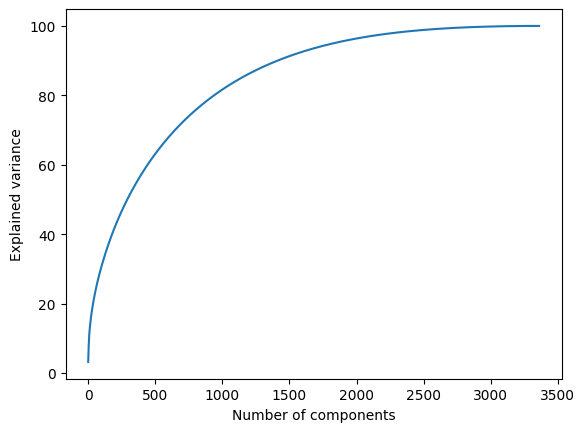

In [34]:
# PCA lemmatization CV
total_components = len(X_lemmatization_cv.columns)
print (100/total_components)
total_components
# X_lemmatization_cv
n_components = 1900
X_lemmatization_cv_PCA = perform_PCA (X_lemmatization_cv, y, total_components, n_components)

0.02975304968759298
Variance explained by all 3361 principal components = 99.99999999999973
[  4.81792785   6.67663129   8.4935745  ... 100.         100.
 100.        ]

95.29723450948536
2000



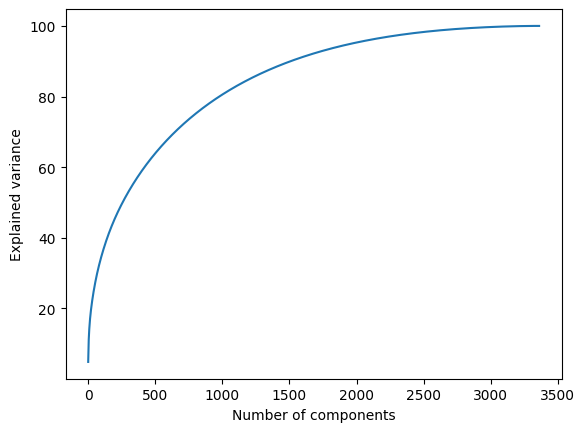

In [35]:
# PCA lemmatization TF IDF
total_components = len(X_lemmatization_tf.columns)
print (100/total_components)
n_components = 2000
X_lemmatization_tf_PCA = perform_PCA (X_lemmatization_tf, y, total_components, n_components)

In [36]:
# def split_data_train_test_split(X,y):
#  from sklearn.model_selection import train_test_split
#  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#  return(X_train, X_test,y_train,y_test)

import math
from sklearn.model_selection import train_test_split

def split_data_train_test_split(X,y):
    X_class = {
        0: [],
        1: []}
    for i in range(len(y)):
        X_class[y[i]].append(X[i])
    X_0_candidate = X_class[0][:len(X_class[1])]
    X_0_add = X_class[0][len(X_class[1]):]
    
    X_candidate = np.concatenate((X_0_candidate, X_class[1]))
    
    y_candidate = np.array([0 for i in range(len(X_0_candidate))])
    y_candidate = np.concatenate((y_candidate,np.array([1 for i in range(len(X_0_candidate))])))

    y_0_add = np.array([0 for i in range(len(X_0_add))])
    
    
    X_train, X_test, y_train, y_test = train_test_split(X_candidate, y_candidate, test_size = 0.2, random_state = 0)

#     X_test = np.concatenate((X_test, X_0_add))
#     y_test = np.concatenate((y_test, y_0_add))
    
    return(X_train, X_test,y_train,y_test)

In [37]:
X_train_lemmatization_cv, X_test_lemmatization_cv,y_train_lemmatization_cv,y_test_lemmatization_cv=split_data_train_test_split(X_lemmatization_cv_PCA,y)
X_train_lemmatization_tf, X_test_lemmatization_tf,y_train_lemmatization_tf,y_test_lemmatization_tf=split_data_train_test_split(X_lemmatization_tf_PCA,y)

In [38]:
y_test_lemmatization_cv

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,

In [39]:
# y

In [40]:
# PCA on portered data
y = df_portered_TF_IDF['class']
X_portered_tf = df_portered_TF_IDF.copy()
X_portered_tf.drop ('class', axis=1, inplace=True)

X_portered_cv = df_portered_CV.copy()
X_portered_cv.drop ('class', axis=1, inplace=True)

0.02975304968759298
Variance explained by all 3361 principal components = 99.99999999999993
[  3.60377501   5.18815685   6.44750013 ... 100.         100.
 100.        ]

86.91046246473178
1250



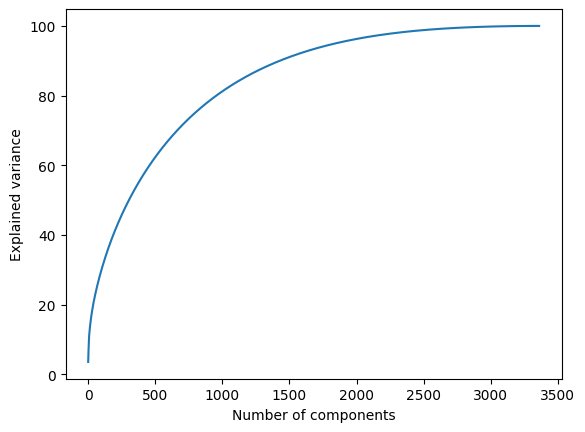

In [41]:
# PCA portered CV
total_components = len(X_portered_cv.columns)
print (100/total_components)
n_components = 1250
X_portered_cv_PCA = perform_PCA (X_portered_cv, y, total_components, n_components)

0.02975304968759298
Variance explained by all 3361 principal components = 100.00000000000036
[  5.55235997   7.62424166   9.53848896 ... 100.         100.
 100.        ]

86.45006183572511
1350



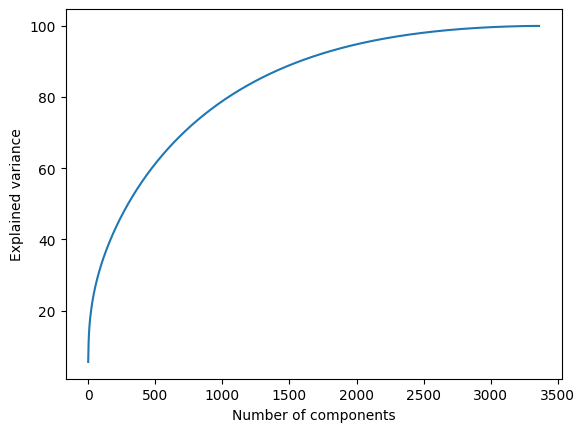

In [42]:
# PCA portered TF IDF
total_components = len(X_portered_tf.columns)
print (100/total_components)
n_components = 1350
X_portered_tf_PCA = perform_PCA (X_portered_tf, y, total_components, n_components)

In [43]:
X_train_portered_cv, X_test_portered_cv,y_train_portered_cv,y_test_portered_cv=split_data_train_test_split(X_portered_cv_PCA,y)
X_train_portered_tf, X_test_portered_tf,y_train_portered_tf,y_test_portered_tf=split_data_train_test_split(X_portered_tf_PCA,y)

In [44]:
y_train_portered_cv

array([1, 0, 1, ..., 0, 0, 1])

In [45]:
y_test_portered_cv

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,

In [46]:


class Data:
    def __init__(self, x_train, y_train, x_test, y_test):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

class Result:
    def __init__(self, y_test, y_pred, label=None):
        self.label = label
        self.accuracy = accuracy_score(y_test,y_pred) * 100
        self.precision = precision_score(y_test, y_pred, average='binary') * 100
        self.recall = recall_score(y_test, y_pred, average='binary') * 100
        self.f1 = f1_score(y_test, y_pred, average='binary') * 100
        self.confusion_matrix = confusion_matrix(y_test, y_pred)
        
    def show(self):
        print("Accuracy = ",self.accuracy,"%")
        print("Precision = ",self.precision)
        print("Recall = ",self.recall)
        print("F1 Score = ",self.f1)
        print("Confusion Matrix: \n", self.confusion_matrix)
        
def getResult(data, res):
    result = Result(data.y_test, res)
    result.show()
    return result

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer

def getBestModel(data, model, param_grid, cv=10):
    scorer = make_scorer(metrics.f1_score , average='binary')
    grid = GridSearchCV(model, 
                        param_grid,
                        cv=cv,
                        scoring=scorer)


    grid.fit(data.x_train, data.y_train)
    
    return grid

In [47]:
from sklearn.svm import SVC
from sklearn import svm

def runSVM(data):
    svm_param_grid = {'C': [0.1, 0.2, 0.3, 0.5, 1, 2, 3, 5, 10], 
                      'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                      'gamma': [1,0.1,0.01,0.001]
                     } 

    grid = getBestModel(data, svm.SVC(), svm_param_grid, cv=10)

    y_pred = grid.predict(data.x_test)
    getResult(data, y_pred)
    print(grid.best_params_)
    return grid

from sklearn.ensemble import RandomForestClassifier

def runRF(data):
    random_forest_params_grid = {
        'n_estimators': [i for i in range(100, 1000, 100)],
        'criterion': ['gini', 'entropy'],
        'max_features': ['sqrt', 'log2'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'random_state': [0]
    }

    grid = getBestModel(data, RandomForestClassifier(), random_forest_params_grid, 10)

    y_pred = grid.predict(data.x_test)
    getResult(data, y_pred)
    print(grid.best_params_)
    return grid
    
from sklearn.tree import DecisionTreeClassifier

def runDT(data):
    decision_tree_params = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [i for i in range(100, 1000, 100)],
        'max_features': ['sqrt', 'log2'],
        'random_state': [0]
    }

    grid = getBestModel(data, DecisionTreeClassifier(), decision_tree_params)

    y_pred = grid.predict(data.x_test)

    getResult(data, y_pred)

    print(grid.best_params_)
    return grid

from sklearn.neighbors import KNeighborsClassifier

def runKNN(data):

    knn_params_grid = {
        'n_neighbors': [i for i in range(3,20)],
        'p': [1,2],
        'metric' : ['minkowski','euclidean','manhattan', 'chebyshev'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }

    grid = getBestModel(data, KNeighborsClassifier(), knn_params_grid)

    y_pred = grid.predict(data.x_test)

    getResult(data, y_pred)

    print(grid.best_params_)
    return grid

from sklearn.naive_bayes import GaussianNB

def runNB(data):

    nb_params_grid = {
    }

    grid = getBestModel(data, GaussianNB(), nb_params_grid)

    y_pred = grid.predict(data.x_test)

    getResult(data, y_pred)

    print(grid.best_params_)
    return grid


In [48]:
data_lemmatization_cv = Data(X_train_lemmatization_cv, y_train_lemmatization_cv, X_test_lemmatization_cv, y_test_lemmatization_cv)
data_lemmatization_tf = Data(X_train_lemmatization_tf, y_train_lemmatization_tf, X_test_lemmatization_tf, y_test_lemmatization_tf)
data_portered_cv = Data(X_train_portered_cv, y_train_portered_cv, X_test_portered_cv, y_test_portered_cv)
data_portered_tf = Data(X_train_portered_tf, y_train_portered_tf, X_test_portered_tf, y_test_portered_tf)


In [49]:
print('Lemmatization CV')
grid = runSVM(data_lemmatization_cv)

print('Lemmatization TF-IDF')
grid = runSVM(data_lemmatization_tf)

print('Portered CV')
grid = runSVM(data_portered_cv)

print('Portered TF-IDF')
grid = runSVM(data_portered_tf)


Lemmatization CV
Accuracy =  91.35514018691589 %
Precision =  89.86175115207374
Recall =  92.85714285714286
F1 Score =  91.33489461358315
Confusion Matrix: 
 [[196  22]
 [ 15 195]]
{'C': 3, 'gamma': 0.1, 'kernel': 'rbf'}
Lemmatization TF-IDF
Accuracy =  92.5233644859813 %
Precision =  90.82568807339449
Recall =  94.28571428571428
F1 Score =  92.5233644859813
Confusion Matrix: 
 [[198  20]
 [ 12 198]]
{'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}
Portered CV
Accuracy =  89.48598130841121 %
Precision =  88.37209302325581
Recall =  90.47619047619048
F1 Score =  89.41176470588236
Confusion Matrix: 
 [[193  25]
 [ 20 190]]
{'C': 5, 'gamma': 0.1, 'kernel': 'sigmoid'}
Portered TF-IDF
Accuracy =  93.92523364485982 %
Precision =  92.5925925925926
Recall =  95.23809523809523
F1 Score =  93.89671361502347
Confusion Matrix: 
 [[202  16]
 [ 10 200]]
{'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}


In [50]:
print('Lemmatization CV')
grid = runRF(data_lemmatization_cv)

print('Lemmatization TF-IDF')
grid = runRF(data_lemmatization_tf)

print('Portered CV')
grid = runRF(data_portered_cv)

print('Portered TF-IDF')
grid = runRF(data_portered_tf)

Lemmatization CV
Accuracy =  88.78504672897196 %
Precision =  86.81818181818181
Recall =  90.95238095238095
F1 Score =  88.83720930232558
Confusion Matrix: 
 [[189  29]
 [ 19 191]]
{'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 400, 'random_state': 0}
Lemmatization TF-IDF
Accuracy =  88.78504672897196 %
Precision =  87.5
Recall =  90.0
F1 Score =  88.73239436619718
Confusion Matrix: 
 [[191  27]
 [ 21 189]]
{'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500, 'random_state': 0}
Portered CV
Accuracy =  88.78504672897196 %
Precision =  86.16071428571429
Recall =  91.9047619047619
F1 Score =  88.94009216589862
Confusion Matrix: 
 [[187  31]
 [ 17 193]]
{'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 700, 'random_state': 0}
Portered TF-IDF
Accuracy =  89.95327102803739 %
Precision =  89.2018779342723

In [51]:
print('Lemmatization CV')
grid = runDT(data_lemmatization_cv)

print('Lemmatization TF-IDF')
grid = runDT(data_lemmatization_tf)

print('Portered CV')
grid = runDT(data_portered_cv)

print('Portered TF-IDF')
grid = runDT(data_portered_tf)


Lemmatization CV
Accuracy =  64.01869158878505 %
Precision =  62.727272727272734
Recall =  65.71428571428571
F1 Score =  64.18604651162792
Confusion Matrix: 
 [[136  82]
 [ 72 138]]
{'criterion': 'entropy', 'max_depth': 100, 'max_features': 'sqrt', 'random_state': 0}
Lemmatization TF-IDF
Accuracy =  68.92523364485982 %
Precision =  68.96551724137932
Recall =  66.66666666666666
F1 Score =  67.79661016949153
Confusion Matrix: 
 [[155  63]
 [ 70 140]]
{'criterion': 'entropy', 'max_depth': 100, 'max_features': 'sqrt', 'random_state': 0}
Portered CV
Accuracy =  71.96261682242991 %
Precision =  70.27027027027027
Recall =  74.28571428571429
F1 Score =  72.22222222222223
Confusion Matrix: 
 [[152  66]
 [ 54 156]]
{'criterion': 'entropy', 'max_depth': 100, 'max_features': 'sqrt', 'random_state': 0}
Portered TF-IDF
Accuracy =  72.19626168224299 %
Precision =  73.82198952879581
Recall =  67.14285714285714
F1 Score =  70.32418952618454
Confusion Matrix: 
 [[168  50]
 [ 69 141]]
{'criterion': 'gini

In [52]:
print('Lemmatization CV')
grid = runKNN(data_lemmatization_cv)

print('Lemmatization TF-IDF')
grid = runKNN(data_lemmatization_tf)

print('Portered CV')
grid = runKNN(data_portered_cv)

print('Portered TF-IDF')
grid = runKNN(data_portered_tf)


Lemmatization CV
Accuracy =  82.94392523364486 %
Precision =  83.09178743961353
Recall =  81.9047619047619
F1 Score =  82.49400479616308
Confusion Matrix: 
 [[183  35]
 [ 38 172]]
{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 7, 'p': 2}
Lemmatization TF-IDF
Accuracy =  87.14953271028037 %
Precision =  82.42677824267783
Recall =  93.80952380952381
F1 Score =  87.75055679287304
Confusion Matrix: 
 [[176  42]
 [ 13 197]]
{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 4, 'p': 2}
Portered CV
Accuracy =  84.57943925233646 %
Precision =  84.61538461538461
Recall =  83.80952380952381
F1 Score =  84.21052631578948
Confusion Matrix: 
 [[186  32]
 [ 34 176]]
{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 5, 'p': 2}
Portered TF-IDF
Accuracy =  80.8411214953271 %
Precision =  74.8062015503876
Recall =  91.9047619047619
F1 Score =  82.47863247863249
Confusion Matrix: 
 [[153  65]
 [ 17 193]]
{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 6, 'p': 2

In [53]:
print('Lemmatization CV')
grid = runNB(data_lemmatization_cv)

print('Lemmatization TF-IDF')
grid = runNB(data_lemmatization_tf)

print('Portered CV')
grid = runNB(data_portered_cv)

print('Portered TF-IDF')
grid = runNB(data_portered_tf)


Lemmatization CV
Accuracy =  63.084112149532714 %
Precision =  61.81818181818181
Recall =  64.76190476190476
F1 Score =  63.25581395348837
Confusion Matrix: 
 [[134  84]
 [ 74 136]]
{}
Lemmatization TF-IDF
Accuracy =  69.62616822429906 %
Precision =  67.69911504424779
Recall =  72.85714285714285
F1 Score =  70.18348623853213
Confusion Matrix: 
 [[145  73]
 [ 57 153]]
{}
Portered CV
Accuracy =  66.1214953271028 %
Precision =  66.00985221674877
Recall =  63.8095238095238
F1 Score =  64.89104116222761
Confusion Matrix: 
 [[149  69]
 [ 76 134]]
{}
Portered TF-IDF
Accuracy =  73.13084112149532 %
Precision =  72.30046948356808
Recall =  73.33333333333333
F1 Score =  72.81323877068559
Confusion Matrix: 
 [[159  59]
 [ 56 154]]
{}
